<a href="https://www.kaggle.com/code/walimohamed/housing-prices-regression-models?scriptVersionId=121382556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/blazeface/tfjs/default/1/model.json
/kaggle/input/blazeface/tfjs/default/1/group1-shard1of1.bin


In [54]:
#pip install llvmlite --ignore installed before


In [55]:
#pip install --ignore-installed --pre pycaret

In [56]:
#pip install nemo_toolkit[all]

In [57]:
#pip install pycaret

In [58]:
#pip install autoviz

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

#from pycaret.regression  import *
from sklearn.model_selection import cross_val_score

In [60]:
#data_cleaning_suggestions(df_train)
df_train=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')


In [61]:
#s=setup(df_train.drop('SalePrice',axis=1), target=df_train['SalePrice'] )

In [62]:
#best=compare_models()

In [63]:
pip install catboost

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [64]:
from catboost import CatBoostRegressor

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from category_encoders import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, make_scorer

In [66]:
def wrangle(path):
    df=pd.read_csv(path)
  
    # create new features
    df['property_age']=df['YrSold']-df['YearBuilt']
    df['garage_age']=df['YrSold']-df['GarageYrBlt']
    df.drop(columns=['YrSold','GarageYrBlt','YearBuilt'],inplace=True)
    # low correlation features <0.1
    df.drop(columns=['PoolArea', 'MSSubClass', 'OverallCond',\
            'MoSold', '3SsnPorch', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath',\
            'BsmtFinSF2'],inplace=True)
    # drop features with high nulls values
    df.drop(columns=['Alley','FireplaceQu','PoolQC','MiscFeature'], inplace=True)
    # drop low cardinality columns
    df.drop(columns=['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'Fence'], inplace=True)
    
    return df
    

In [67]:
df_train=wrangle('/kaggle/input/home-data-for-ml-course/train.csv')
df_test=wrangle('/kaggle/input/home-data-for-ml-course/test.csv')

In [68]:
#df_train1=wrangle(df_train)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotConfig      1460 non-null   object 
 4   Neighborhood   1460 non-null   object 
 5   Condition1     1460 non-null   object 
 6   Condition2     1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  RoofMatl       1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterCond      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtFinT

In [70]:
cols=df_train.corr()
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [71]:
# absolute_cols=abs(df_train.corr()['SalePrice']).sort_values(ascending=False)
# absolute_cols

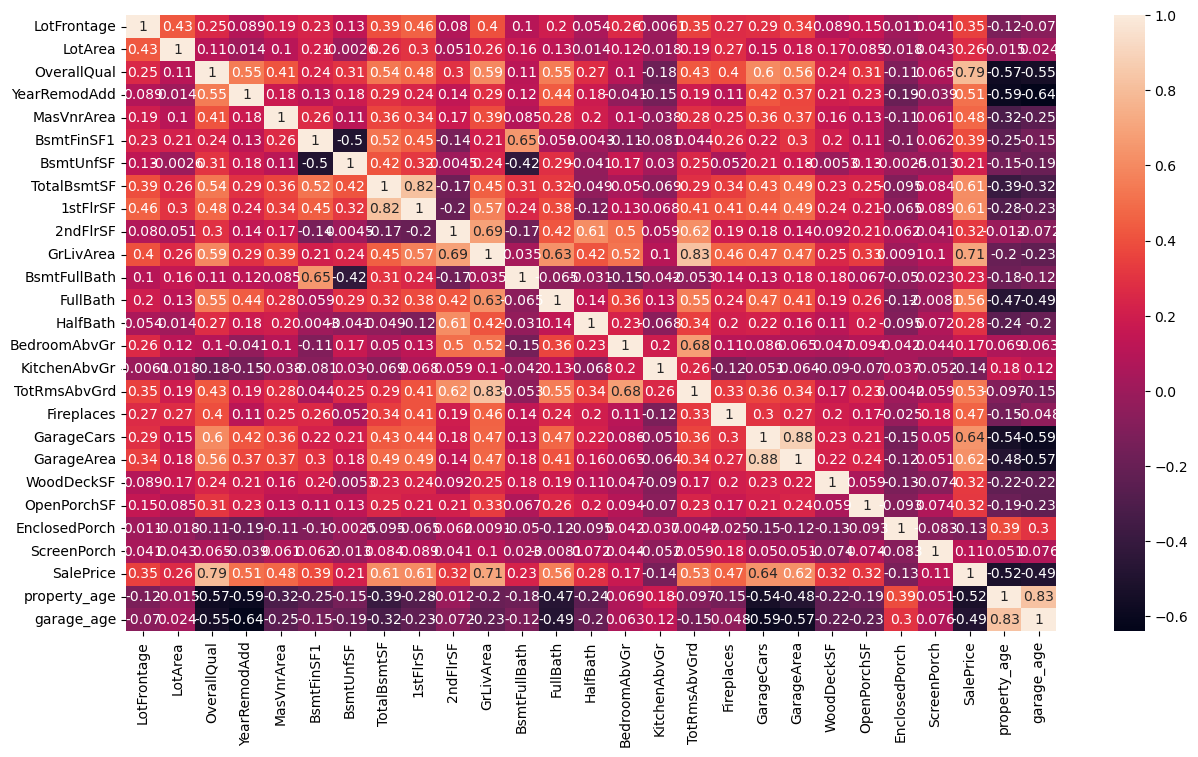

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(cols, annot=True);

In [73]:
len(cols['SalePrice'])

27

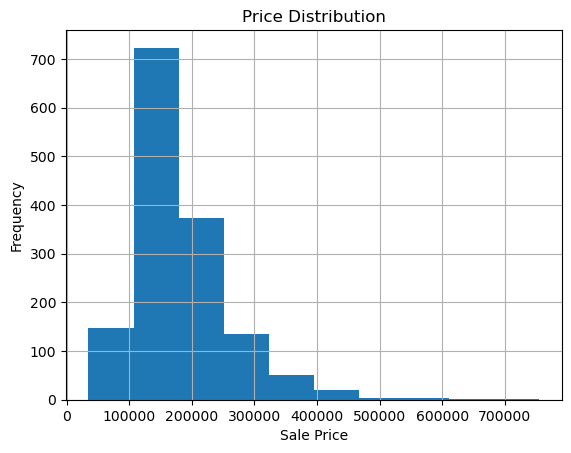

In [74]:
# check for outliers in the price
df_train.SalePrice.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

In [75]:
# drop any properties having a saleprice above 450K
mask= df_train['SalePrice']<450000
df_train1=df_train[mask]

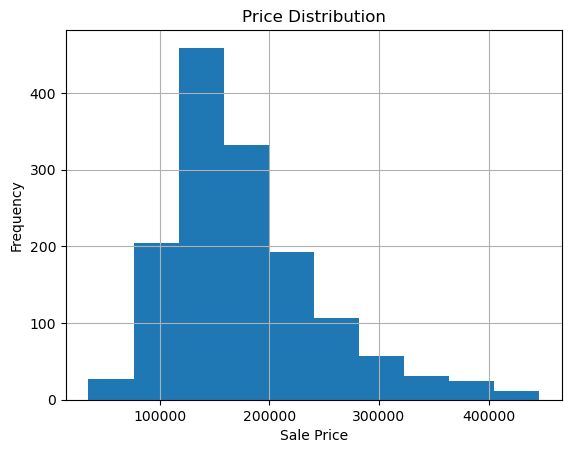

In [76]:
# check for outliers in the price after slicing
df_train1.SalePrice.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

In [77]:
df_train.isnull().sum().sort_values(ascending=False)

LotFrontage      259
garage_age        81
GarageCond        81
GarageQual        81
GarageType        81
BsmtFinType2      38
BsmtFinType1      37
MasVnrArea         8
Electrical         1
OverallQual        0
LotConfig          0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
Neighborhood       0
GarageCars         0
GarageArea         0
LotArea            0
YearRemodAdd       0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
SaleType           0
SaleCondition      0
SalePrice          0
property_age       0
HalfBath           0
FullBath           0
BsmtFullBath       0
GrLivArea          0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
HouseStyle         0
ExterCond          0
Foundation         0
BldgType           0
BsmtFinSF1         0
Condition2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
Condition1   

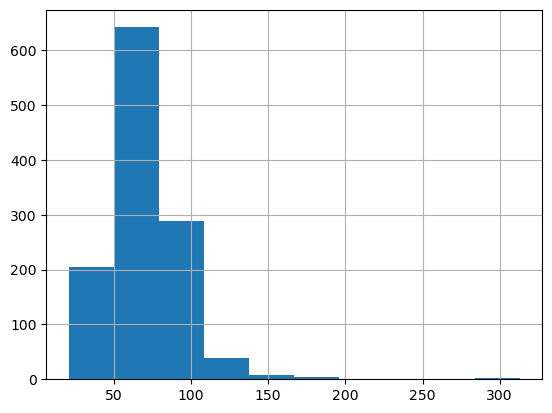

In [78]:
# this feature has missing values and therefore we will check for outliers
df_train1['LotFrontage'].hist();
# I will use median to impute the missing values


In [79]:
# drop any properties having a LotFrontage above 150K
mask= df_train1['LotFrontage']<150000
df_train2=df_train1[mask]

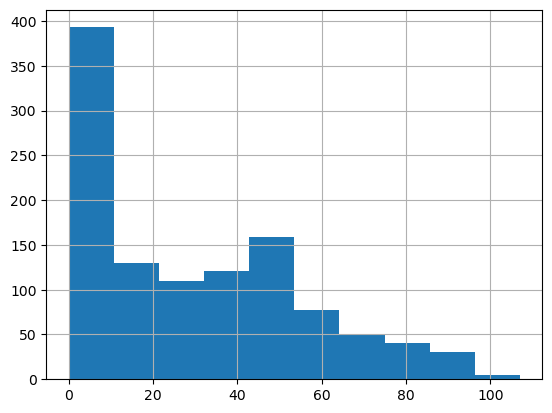

In [80]:
# this feature has missing values and therefore we will check for outliers
df_train2['garage_age'].hist();
# I will use median to impute the missing values


In [81]:
df_train2.isnull().sum()

MSZoning          0
LotFrontage       0
LotArea           0
LotConfig         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        5
ExterCond         0
Foundation        0
BsmtFinType1     31
BsmtFinSF1        0
BsmtFinType2     32
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       74
GarageCars        0
GarageArea        0
GarageQual       74
GarageCond       74
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
ScreenPorch       0
SaleType          0
SaleCondition     0
SalePrice         0
property_age      0


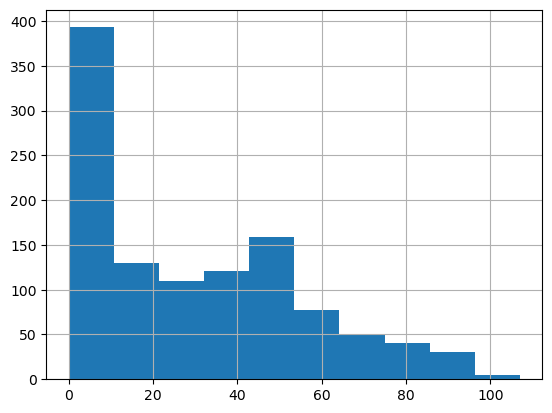

In [82]:
# this feature has missing values and therefore we will check for outliers
df_train2['garage_age'].hist();
# I will use mean to impute the missing values since it does not have outliers


In [83]:
# there is no high cardinality
df_objects=df_train2.select_dtypes('object').nunique()
#print(df_objects)
mask_ob=df_objects<5
bool=mask_ob.to_list()
len(mask_ob)
df_objects.iloc[bool].index


Index([], dtype='object')

In [84]:
X=df_train2.drop('SalePrice', axis=1)
y=df_train2['SalePrice']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)

In [86]:
print(X_train.shape, X_test.shape)

(1069, 50) (119, 50)


In [87]:
### Baseline

In [88]:
y_mean = y_train.mean()
y_mean

176235.59681945742

In [89]:
y_mean_predictions=[y_mean]*len(y_train)
mae=mean_absolute_error(y_mean_predictions, y_train)
r2=r2_score(y_mean_predictions, y_train)
print('Baseline MAE',round(mae,2))
print('Baseline R2',round(r2,2))

Baseline MAE 56253.08
Baseline R2 -6.296278549672879e+30


In [90]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [91]:
X_train.select_dtypes('object').columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [92]:
column_transform=make_column_transformer((SimpleImputer(strategy='median'), X_train.select_dtypes(exclude='object').columns),
                        (SimpleImputer(strategy='most_frequent'), X_train.select_dtypes(include='object').columns)
                        ,remainder='passthrough')

In [137]:
from xgboost import XGBRegressor
model= make_pipeline(
    
    column_transform,
    OneHotEncoder(use_cat_names=True),
    MinMaxScaler(),
    #CatBoostRegressor(logging_level='Silent')
    XGBRegressor(max_depth=6,
             learning_rate=0.05579235276617039, 
            subsample=0.6180506439049763,
             gamma=2.0791752419917375,
             alpha=0.3523524041733057 )
    
    



)

## Use GridSearchCV

In [94]:
%%time
from xgboost import XGBRegressor
# Choose the type of classifier. 
xgb_tuned = model

# Grid of parameters to choose from

parameters = {
    "xgbregressor__n_estimators": [10, 50, 100],
    "xgbregressor__subsample":[0.6, 0.8, 1],
    "xgbregressor__learning_rate":[0.01, 0.1, 0.5, 1],
    "xgbregressor__gamma":[0.01, 0.1, 1, 5],
    "xgbregressor__colsample_bytree":[0.5, 0.7, 0.9, 1],
    "xgbregressor__alpha":[0, 0.1, 0.5]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,
                        cv=5, n_jobs=-1, verbose=2)

#grid_obj = grid_obj.fit(X_train, y_train)

CPU times: user 62 µs, sys: 17 µs, total: 79 µs
Wall time: 83 µs


In [95]:
#grid_obj.best_params

## Method 2: Randomized Search

In [96]:
%%time
# Run the grid search
rand_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,
                              n_iter=20, n_jobs=-1, cv=5, verbose=1)

#rand_obj = rand_obj.fit(X_train, y_train)

CPU times: user 16 µs, sys: 5 µs, total: 21 µs
Wall time: 24.3 µs


In [97]:
#rand_obj.best_params_

{'xgbregressor__subsample': 0.6,
 'xgbregressor__n_estimators': 100,
 'xgbregressor__learning_rate': 0.1,
 'xgbregressor__gamma': 0.01,
 'xgbregressor__colsample_bytree': 0.5,
 'xgbregressor__alpha': 0.1}

In [98]:
#rand_obj.cv_results_

## Method 3: Bayesian Search on the same search space as Grid Search

In [99]:
pip install scikit-optimize

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [100]:
%%time
from skopt import BayesSearchCV
bayes = BayesSearchCV(xgb_tuned,
                      search_spaces=parameters, # same space as GridSearch
                      n_iter=20, cv=5)

#bayes.fit(X_train, y_train)

CPU times: user 7.8 ms, sys: 1.22 ms, total: 9.02 ms
Wall time: 8.45 ms


In [101]:
#bayes.best_params_

OrderedDict([('xgbregressor__alpha', 0.5),
             ('xgbregressor__colsample_bytree', 0.9),
             ('xgbregressor__gamma', 0.1),
             ('xgbregressor__learning_rate', 0.1),
             ('xgbregressor__n_estimators', 100),
             ('xgbregressor__subsample', 0.6)])

Method 4: Using continuous Search Spaces for Bayesian Search

In [102]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score

bayes_space = model

space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Real(0.5, 1,"uniform", name='subsample'),
          Real(10**-5, 10**1, "uniform", name='gamma'),
          Real(10**-5, 10**0, "uniform", name='alpha'),]

# The decorator below enables the objective function
# to receive the parameters as keyword arguments.
@use_named_args(space)
def objective(**params):
    '''
    Scitkit Learn Optimize requires an objective function to minimize.
    We use the average of cross-validation mean absolute errors as 
    the objective function (also called cost function in optimization)
    '''
    xgb_tuned.named_steps['xgbregressor'].set_params(**params)

    return -np.mean(cross_val_score(xgb_tuned, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [103]:
%%time
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)

CPU times: user 6.77 s, sys: 6.52 s, total: 13.3 s
Wall time: 23min 16s


In [109]:
res_gp.x

[6,
 0.05579235276617039,
 0.6180506439049763,
 2.0791752419917375,
 0.3523524041733057]

[6,
 0.05579235276617039,
 0.6180506439049763,
 2.0791752419917375,
 0.3523524041733057]

In [127]:
XGBRegressor(max_depth=6,
             learning_rate=0.05579235276617039, 
            subsample=0.6180506439049763,
             gamma=2.0791752419917375,
             alpha=0.3523524041733057 )

XGBRegressor(alpha=0.3523524041733057, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=2.0791752419917375, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05579235276617039, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, ...)

In [122]:
XGBRegressor(max_depth=6,
             learning_rate=0.055, \
            subsample=0.6180506,\
             gamma=2.0791752,\
             alpha=0.352352404 )

XGBRegressor(alpha=0.352352404, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=2.0791752,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.055, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, ...)

In [ ]:
XGBRegressor

## Iterate

In [138]:
%%time
model.fit(X_train, y_train)

CPU times: user 35.7 s, sys: 144 ms, total: 35.8 s
Wall time: 10.5 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Kitche...
                              gamma=2.0791752419917375, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.05579235276617039, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                            

## Evaluate

In [139]:

predictions=model.predict(X_train)
mae=mean_absolute_error(predictions, y_train)
r2=r2_score(predictions, y_train)
print('Training MAE',round(mae,2))
print('Training R2',round(r2,2))

Training MAE 11090.65
Training R2 0.95


In [140]:
predictions=model.predict(X_test)

mae=mean_absolute_error(predictions, y_test)
r2=r2_score(predictions, y_test)
print('testing MAE',round(mae,2))
print('Test R2',round(r2,2))

testing MAE 20924.37
Test R2 0.71


In [141]:
test_predictions=pd.Series(predictions)
test_predictions

0      269515.656250
1      182212.796875
2      120844.773438
3      139759.468750
4      258085.437500
           ...      
114    234753.390625
115    209519.890625
116    217405.906250
117    178157.500000
118    320626.906250
Length: 119, dtype: float32

In [142]:
# Plot the model
pred_df1=y_test.to_frame('True test Y')
pred_df1.reset_index(inplace=True)
pred_df1.drop('index', axis=1, inplace=True)


In [143]:
pred_df=pd.concat([pred_df1, test_predictions], axis=1)
pred_df.columns=['True test Y', 'Model Predictions']
pred_df

,True test Y,Model Predictions
0,225000,269515.656250
1,181000,182212.796875
2,91500,120844.773438
3,131400,139759.468750
4,279500,258085.437500
...,...,...
114,140000,234753.390625
115,194201,209519.890625
116,162900,217405.906250
117,82500,178157.500000


<AxesSubplot:xlabel='True test Y', ylabel='Model Predictions'>

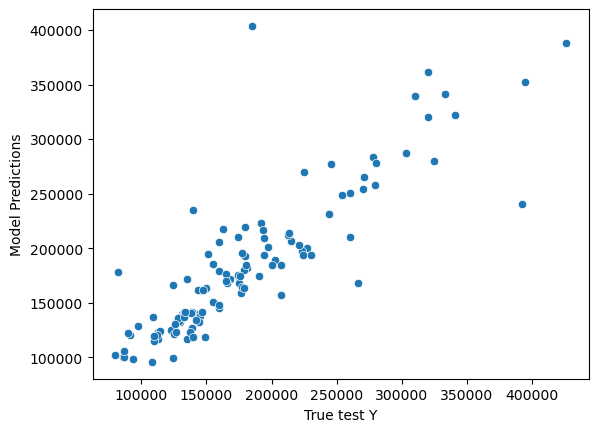

In [144]:
sns.scatterplot(x='True test Y', y='Model Predictions', data=pred_df)

In [145]:
test_pred=model.predict(df_test)

In [146]:
sub=pd.read_csv('/kaggle/input/home-data-for-ml-course/sample_submission.csv')

In [147]:
sub['SalePrice']=test_pred

In [148]:
sub.head()

,Id,SalePrice
0,1461,119233.757812
1,1462,143328.703125
2,1463,180922.796875
3,1464,191989.562500
4,1465,202555.968750


In [149]:
sub.to_csv('submission1.csv', index=False)

## Communicate Results

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as:

<center><img src="../images/proj-2.003.png" alt="Equation: y = m*x + b" style="width: 400px;"/></center>

Since data scientists often work with more complicated linear models, they prefer to write the equation as:

<center><img src="../images/proj-2.004.png" alt="Equation: y = beta 0 + beta 1 * x" style="width: 400px;"/></center>

Regardless of how we write the equation, we need to find the values that our model has determined for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this information in the model itself. Let's start with the intercept.

In [ ]:
imp = model.named_steps['catboostregressor'].feature_importances_[0]
print("Feature importances:", imp)
feat=model.named_steps['onehotencoder'].get_feature_names_in()
feat

